In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
df=pd.read_csv("ex2data1.txt",header=None)
df.head(5)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
m = len(df.values)
X = df.values[:,:2]
y = df.values[:,2].reshape(m,1)

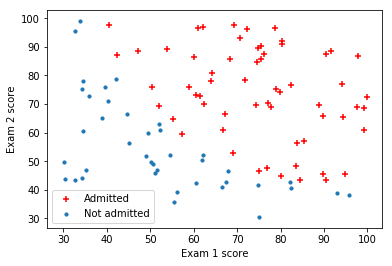

In [3]:
pos , neg = (y==1) , (y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

In [4]:
def sigmoid(z):

    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================

    g = 1/(1+np.exp(-z))

    # =============================================================
    return g
sigmoid(0)

0.5

In [5]:
m = X.shape[0]
X1 = np.append(np.ones((m,1)), X, axis = 1)
X1.shape

(100, 3)

In [77]:
def costfunction(X,y,theta):  
    # Initialize some useful values
    m = len(y)  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    predicts = sigmoid(np.dot(X,theta.transpose()))
    error = (-y*np.log(predicts)) - ((1-y)*np.log(1-predicts))
    J = 1/m * sum(error)
    grad = 1/m * np.dot(X.transpose(),(predicts - y))
    # =============================================================
    return J[0], grad

In [7]:
# Initialize fitting parameters
n = X.shape[1]
initial_theta = np.array([[0.0,0.0,0.0]])

cost, grad = costfunction(X1, y, initial_theta)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]\n',grad)
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24, 0.2, 0.2]])
cost, grad = costfunction(X1, y, test_theta)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]',grad)
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[{:.4f}, {:.4f}, {:.4f}]
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[{:.3f}, {:.3f}, {:.3f}] [[0.04290299]
 [2.56623412]
 [2.64679737]]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


In [11]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma
    
    return X_norm

In [62]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costfunction(X,y,theta)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta,J_history[num_iters-1]

In [93]:
X_n = featureNormalization(X)
m = len(y)
X_n = np.append(np.ones((m,1)), X_n, axis = 1)
initial_theta = np.array([[0.0,0.0,0.0]])
theta, J_history = gradientDescent(X_n, y, initial_theta, 0.01, 250)
print("Improved Cost: ",J_history)
print("Optimized Theta: ", theta)

Improved Cost:  0.6444115558695462
Optimized Theta:  [[0.18628792 0.05755963 0.0765197 ]
 [0.66769086 0.5405843  0.55916872]
 [0.58778834 0.46182004 0.48014868]]


In [94]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0
p=classifierPredict(theta,X_n)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %


In [95]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([[1, 45, 85]], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}', prob)
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = classifierPredict(theta, X_n)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of {:.3f} [[1. 1. 1.]]
Expected value: 0.775 +/- 0.002

Train Accuracy: 88.00 %
Expected accuracy (approx): 89.00 %
